In [2]:
import numpy as np
import pandas as pd
import sklearn

In [6]:
df=pd.read_csv("diabetes_1variable.csv")
df.head()

,x,y
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       442 non-null    float64
 1   y       442 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [9]:
df.describe()

,x,y
count,4.420000e+02,442.000000
mean,-8.042209e-16,152.133484
std,4.761905e-02,77.093005
min,-9.027530e-02,25.000000
25%,-3.422907e-02,87.000000
50%,-7.283766e-03,140.500000
75%,3.124802e-02,211.500000
max,1.705552e-01,346.000000


problema de regresion lineal

In [12]:
from sklearn.model_selection import train_test_split
#Codigo con el que se hace la division de los datos

In [13]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=123)
#primero train y despues test
#Random state es el seed

In [15]:
df_train.head()

,x,y
59,-0.025607,170.0
209,-0.018062,77.0
21,-0.022373,49.0
274,-0.024529,66.0
107,0.049840,144.0


In [16]:
df_test.head()

,x,y
13,-0.001895,185.0
66,-0.018062,150.0
234,0.039062,246.0
24,0.035829,184.0
388,-0.024529,110.0


In [24]:
from sklearn import linear_model
RL= linear_model.LinearRegression()
#Creacion del modelo pero no aprendio parametros, no hizo nada. Sabe como tiene que ser el modelo


cuando queremos que aprenda le tenemos que pasar los datos del train. Estos no se pueden pasar como dataframe, sino como array de numpy
Hay un metodo que es el mismo para todos los algoritmos.
Una vez creado el modelo hay que entrenarlo
Hay que hacer fit

In [29]:
#X=df_train.x
#y=df_train.y
#division de las variables, no convuiene asi

In [35]:
#conviene agregarlo asi, porque pide una matriz y lo dacomo vector
X=df_train[["x"]]
y=df_train[["y"]]
#Con dos corchetes se hace una matriz

In [36]:
#Entrenamos el modelo RL con train set
RL.fit(X,y)

LinearRegression()

In [37]:
#ver valores de parametros

In [40]:
w0=RL.intercept_ #w0
w0

array([152.40414643])

In [42]:
w1=RL.coef_
w1

array([[914.80793327]])

Para evaluacion los datos tambien deben ser bidimensionales


In [47]:
x_test=df_test[["x"]]
y_test=df_test[["y"]]
RL.score(x_test,y_test) #Metrica de error rcuadrado

0.3844453198696399

Calcular los resultados de aplicar el modelo RL al x_test. Sus valores deberian ser parecidos a los del y_test
Fit, predcit y score se usan en todos lados

In [51]:
y_pred=RL.predict(x_test)
y_pred

array([[150.6708545 ],
       [135.88098896],
       [188.13851386],
       [185.18054075],
       [129.96504275],
       [148.69887243],
       [254.19991326],
       [125.03508757],
       [168.41869314],
       [106.30125789],
       [124.04909653],
       [146.72689036],
       [169.40468418],
       [183.20855868],
       [145.74089932],
       [135.88098896],
       [111.23121307],
       [158.55878279],
       [170.39067522],
       [223.63419115],
       [137.85297104],
       [220.67621804],
       [147.71288139],
       [101.37130271],
       [124.04909653],
       [180.25058557],
       [144.75490829],
       [144.75490829],
       [131.93702482],
       [144.75490829],
       [136.86698   ],
       [207.85833457],
       [188.13851386],
       [200.95639732],
       [173.34864832],
       [131.93702482],
       [122.07711446],
       [ 81.651482  ],
       [185.18054075],
       [110.24522203],
       [169.40468418],
       [ 91.51139235],
       [115.17517721],
       [142

In [49]:
y_test

,y
13,185.0
66,150.0
234,246.0
24,184.0
388,110.0
...,...
114,258.0
142,235.0
121,173.0
31,59.0


In [52]:
#Calcular RMSE. hay que importarlo. Entre y_pred e y_test

In [54]:
from sklearn.metrics import mean_squared_error

In [57]:
mse=mean_squared_error(y_test,y_pred)
mse

3878.0975305864317

In [59]:
RMSE=np.sqrt(mse)
RMSE

62.274372984289705

<AxesSubplot:xlabel='x', ylabel='y'>

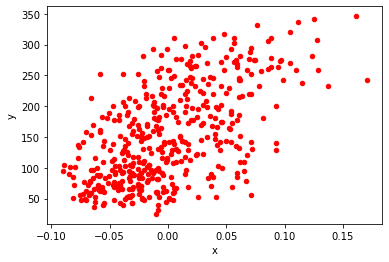

In [61]:
df.plot.scatter(x="x", y="y", c="red")